In [106]:
import numpy as np
from numpy import exp, linspace, vectorize
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann as kB
from scipy.constants import Avogadro as NA
from scipy.constants import hbar
plt.rcParams.update({"xtick.top": True , "ytick.right": True,
                     "xtick.minor.visible": True, "ytick.minor.visible": True,
                     "xti\ck.direction": "in" , "ytick.direction": "in",
                     "axes.labelsize": "large", "text.usetex": False, "font.size": 13
                     })

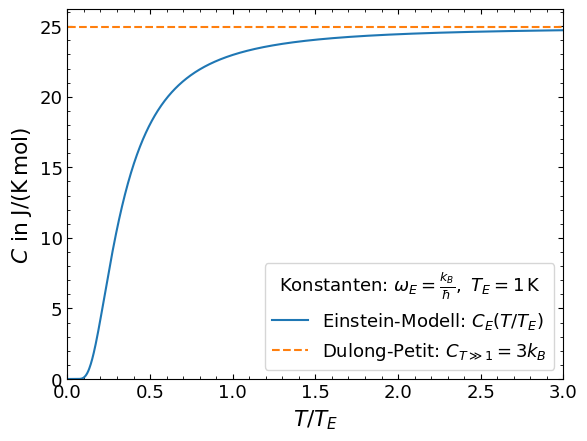

In [107]:
omegaE, TE = kB/hbar,1
C = vectorize(lambda x: 3*kB * NA * x**2 * exp(x) / (exp(x) - 1)**2)
x = vectorize(lambda T: hbar*omegaE / kB / T)

interval = [0,3]
X = linspace(*interval,1000,dtype=np.longfloat)[1:] / TE
Y = C(x(X))

fig,ax = plt.subplots()
ax.plot(X, Y, label=r"Einstein-Modell: $C_E(T/T_E)$")
ax.plot(X, np.ones_like(X)*3*kB*NA, "--", label=r"Dulong-Petit: $C_{T\gg1}=3k_B$")
ax.set(xlim=interval,ylim=[0,3*kB*NA*1.05],xlabel=r"$T/T_E$", ylabel=r"$C$ in $\mathrm{J/(K\, mol)}$")
ax.legend(title=r"Konstanten: $\omega_E = \frac{k_B}{\hbar},\ T_E= 1\,\text{K}$ ")
fig.savefig("2.svg")


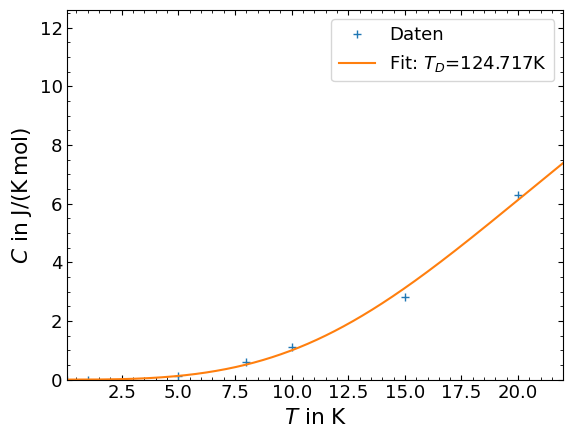

In [108]:
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from numpy import exp

@vectorize
def debye(x_lim):
    if x_lim > 350:
        return 4*np.pi**4 / 15
    f = lambda x: x**4 * exp(x) / (exp(x) - 1)**2
    res = integrate.quad(f, 0, x_lim)
    return res[0]
    
f = lambda T,T_D: 9 * kB * NA * (T/T_D)**3 * debye(T_D/T)

T = np.array([0.1, 1 , 5, 8, 10, 15, 20], dtype=np.longfloat)
C = [8.5e-7, 8.6e-7, .12, .59, 1.1, 2.8, 6.3]
xlim = [min(T),max(T)*1.1]

fit,_ = curve_fit(f,T,C,p0=[124.], bounds=(118,130))

fig,ax = plt.subplots()
ax.plot(T,C,"+",label="Daten")
ax.plot(X:=np.linspace(*xlim,1000), vectorize(f)(X,*fit), label=f"Fit: $T_D$={fit[0]:.3f}K")
ax.set(xlim=xlim, ylim=(0,max(C)*2), xlabel=r"$T$ in K", ylabel=r"$C$ in $\mathrm{J/(K\, mol)}$")
ax.legend()
fig.savefig("fit.svg")

In [109]:
print(debye(120))


25.97575760906732
